IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

INSERTING THE CSV FILE

In [2]:
df = pd.read_csv("IMDb Movies India.csv", encoding='latin1')
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


DATA EXPLORING :

    DATA UNDERSTANDING & CLEANING

In [3]:
df.head(3)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana


In [4]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [5]:
df.dtypes

Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [7]:
df.nunique()

Name        13838
Year          102
Duration      182
Genre         485
Rating         84
Votes        2034
Director     5938
Actor 1      4718
Actor 2      4891
Actor 3      4820
dtype: int64

In [8]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [9]:
print(df.duplicated().sum())

6


In [10]:
df.dropna(subset=['Rating'], inplace=True)

In [11]:
df.fillna('Unknown', inplace=True)

In [12]:
df.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
label= LabelEncoder()
for col in ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']:
    df[col] = label.fit_transform(df[col].astype(str))

In [15]:
df['Duration'] = df['Duration'].str.replace(' min', '', regex=False).replace('Unknown', np.nan).astype(float)
df['Duration'].fillna(df['Duration'].median(), inplace=True)

C:\Users\Akilanbabu\AppData\Local\Temp\ipykernel_17300\1105372725.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Duration'].fillna(df['Duration'].median(), inplace=True)


In [16]:
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')
df['Votes'].fillna(df['Votes'].median(), inplace=True)

C:\Users\Akilanbabu\AppData\Local\Temp\ipykernel_17300\3635991554.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Votes'].fillna(df['Votes'].median(), inplace=True)


In [17]:
df.dtypes

Name         object
Year         object
Duration    float64
Genre         int64
Rating      float64
Votes       float64
Director      int64
Actor 1       int64
Actor 2       int64
Actor 3       int64
dtype: object

SPLITING THE DATASET

In [18]:
x = df[['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Duration', 'Votes']]
y = df['Rating']

In [19]:
x.shape, y.shape

((7919, 7), (7919,))

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [21]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((6335, 7), (1584, 7), (6335,), (1584,))

BUILDING RANDOM FOREST REGRESSOR MODEL

In [22]:
rfr= RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(x_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


TRAIN THE MODEL

In [23]:
y_train_pred = rfr.predict(x_train)

In [24]:
y_train_pred.shape, y_train.shape

((6335,), (6335,))

TEST THE MODEL

In [25]:
y_test_pred=rfr.predict(x_test)

In [26]:
y_test_pred.shape, y_test.shape

((1584,), (1584,))

VISUALIZE THE TRAIN MODEL

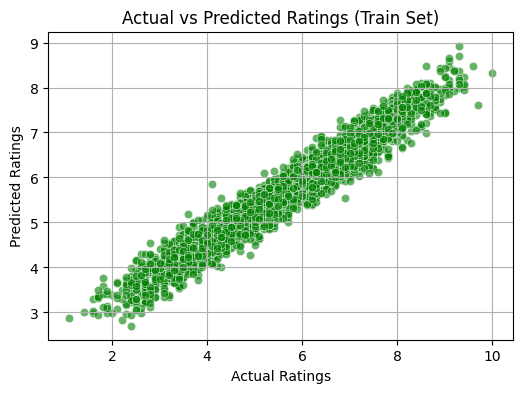

In [27]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_train, y=y_train_pred, alpha=0.6, color='green')
plt.title("Actual vs Predicted Ratings (Train Set)")
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.grid(True)
plt.show()

VISUALIZE THE TEST MODEL

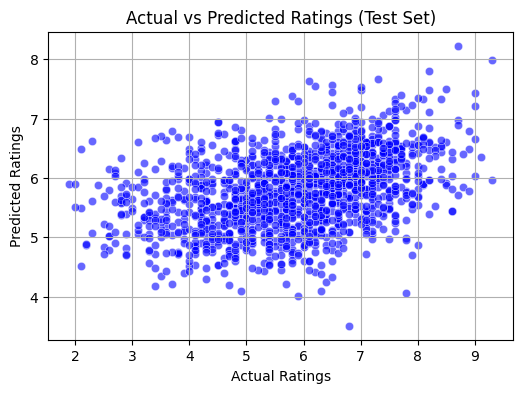

In [28]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.6, color='blue')
plt.title("Actual vs Predicted Ratings (Test Set)")
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.grid(True)
plt.show()

EVALUATE THE TRAIN MODEL

In [29]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)

In [30]:
print("\nTrain Set Evaluation")
print("\nRoot Mean Squared Error:",rmse_train)
print("\nR² Score:",r2_train)


Train Set Evaluation

Root Mean Squared Error: 0.48213626790952774

R² Score: 0.8789917177310058


EVALUATE THE TEST MODEL

In [31]:
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)

In [32]:
print("\nTrain Set Evaluation")
print("\nRoot Mean Squared Error:",rmse_test)
print("\nR² Score:",r2_test)


Train Set Evaluation

Root Mean Squared Error: 1.2469518092013012

R² Score: 0.16365388560625482


COMPARING TRAIN AND TEST VALUES

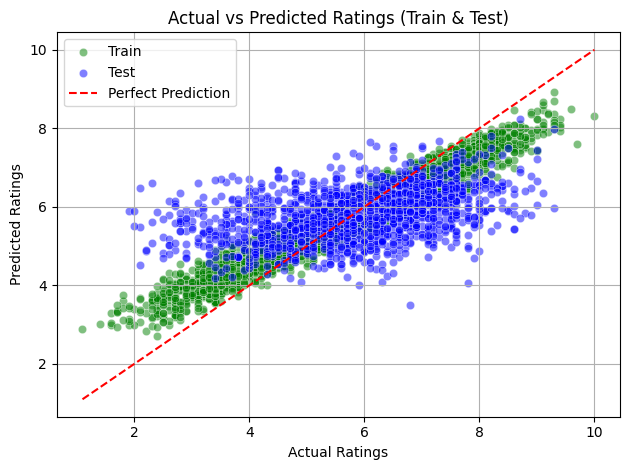

In [33]:
sns.scatterplot(x=y_train, y=y_train_pred, label="Train", color='green', alpha=0.5)
sns.scatterplot(x=y_test, y=y_test_pred, label="Test", color='blue', alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Perfect Prediction')
plt.title("Actual vs Predicted Ratings (Train & Test)")
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()